##### Este notebook tratará acerca del preprocesamiento para la longitud y latitud de las casas, y, asímismo, la eliminación de outliers... 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geohash2 as gh

import warnings
import gc
warnings.filterwarnings('ignore') #Para que no me salgan caveats
gc.collect() #Como garbage cleaner
pd.set_option('display.max_columns',None) #Para ver todas mis columnas...

In [2]:
df = pd.read_csv('data_para_preprocessing.csv')
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [25]:
df.drop(df[df.Precio > df.Precio.quantile(.99)].index, axis=0,inplace=True)

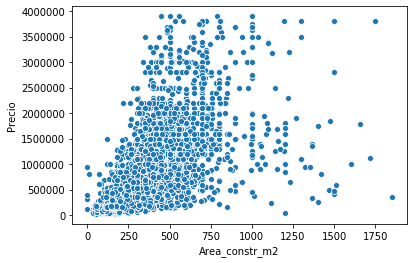

In [37]:
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='Area_constr_m2',y='Precio',data=df)

#Igual se cumpliría el precio por metro cuadrado?

In [33]:
# Podemos dropear también los outliers 
index_to_drop_outlier = df[df.Area_constr_m2 > 1900].index

In [34]:
df.drop(index_to_drop_outlier,axis=0,inplace=True)

In [ ]:
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='Area_constr_m2',y='Precio',data=df)

#Igual se cumpliría el precio por metro cuadrado?

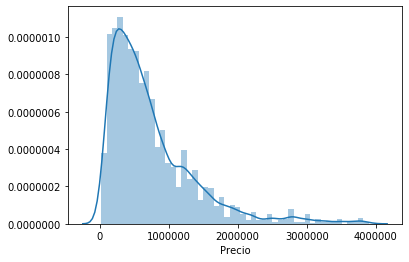

In [36]:
sns.distplot(df['Precio'])

In [38]:
df_gh = df[['longitud','latitud']]

In [39]:
df_gh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 7662
Data columns (total 2 columns):
longitud    7573 non-null float64
latitud     7573 non-null float64
dtypes: float64(2)
memory usage: 177.5 KB


In [40]:
df_gh.head(2)

,longitud,latitud
0,-76.929494,-12.077232
1,-76.872657,-12.005022


#### Geohashing

In [41]:
df_gh.drop(df_gh[df_gh.longitud.isna()].index, axis=0,inplace=True)

In [42]:
df_gh['geohash'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=6), axis = 1)
df_gh.head()

,longitud,latitud,geohash
0,-76.929494,-12.077232,6mc733
1,-76.872657,-12.005022,6mc7dw
2,-76.910620,-12.065150,6mc73g
3,-76.526003,-12.841678,6m9wfw
4,-76.972217,-12.113779,6mc706


In [43]:
df['geohash_grado6'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=6),axis=1)
df['geohash_grado5'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=5),axis=1)
df['geohash_grado7'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=7),axis=1)
df['geohash_grado8'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=8),axis=1)

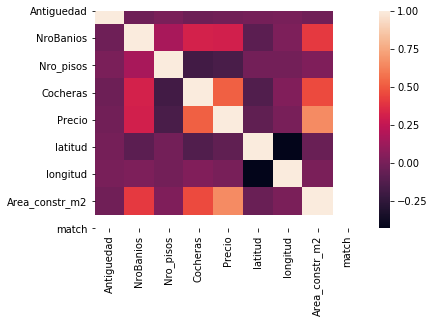

In [46]:
sns.heatmap(df.corr())

In [55]:
df

,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,Estado de Inmueble,Fecha_pub,Luminosidad,Mascotas,Precio,Tipo,TipoCochera,Ubicacion,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr,Area_total,Area_constr_m2,Area_total_m2,match,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia,geohash_grado6,geohash_grado5,geohash_grado7,geohash_grado8
0,5.0,Valentinoinmobiliaria,Nulo,4.0,2.0,3.0,excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",3,Excelente,Publicado el 19.09.19,Muy luminoso,Si,885000.0,Casa,Paralelas,LaMolina-Lima,No,NoEspecifica,-12.077232,-76.929494,450.00 m2,600.00 m2,450.0,600.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LaMolina,Lima,6mc733,6mc73,6mc733m,6mc733mt
1,5.0,No disponible,Nulo,5.0,3.0,1.0,hermosa casa a espalda de futura avenida prol...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,5+,Excelente,Publicado el 28.08.19,Muy luminoso,Si,150000.0,Casa,NoEspecifica,Lurigancho-Lima,Si,Si,-12.005022,-76.872657,350.00 m2,183.00 m2,350.0,183.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lurigancho,Lima,6mc7dw,6mc7d,6mc7dwx,6mc7dwx1
2,3.0,No disponible,Nulo,5.0,3.0,4.0,casa de estreno acabados de primera. calle ce...,"El Pinar 120 , La Planicie 1era Etapa La Molin...",4,Excelente,Publicado el 06.08.19,Muy luminoso,Si,1950000.0,Casa,Paralelas,LaMolina-Lima,NoEspecifica,NoEspecifica,-12.065150,-76.910620,625.00 m2,1518.00 m2,625.0,1518.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,LaMolina,Lima,6mc73g,6mc73,6mc73ge,6mc73ge7
3,1.0,No disponible,Sol Y Mar,5.0,2.0,3.0,linda casa en condominio con piscina club hou...,"Km 98.5 De La Panamericana Sur Asia, Sol Y Mar...",4,Excelente,Publicado el 25.08.19,Muy luminoso,Si,380000.0,Casa de Playa,Paralelas,Asia-Lima,NoEspecifica,NoEspecifica,-12.841678,-76.526003,150.00 m2,150.00 m2,150.0,150.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Feature Engineering

- Sacar Precio de metro cuadrado por Distrito, por geohash?

- Hacer precio por metro cuadrado para usarlo como target después y evaluar las dos métricas.

- Clusterizar longitudes y latitudes 

- Hacer el encoding de los geohashes con word2vec??

- Crear un feature de escala de pituquería. Agrupar distritos y categorizarlos.

- Hacer una variable siguiendo (D = Area_total*W1 + Area_constr*W2) donde 

W1=(Corr(Area_total|Precio)/(Corr(Area_total|Precio)+Corr(Area_constr|Precio))

W2 = (Corr(Area_constr|Precio)/(Corr(Area_total|Precio)+Corr(Area_constr|Precio))

- Hacer variable Dummie que resuma las areas

In [44]:
df.to_csv('data_para_preprocessing_con_gh.csv')

In [54]:
[*df.geohash_grado8.unique()]

['6mc733mt',
 '6mc7dwx1',
 '6mc73ge7',
 '6m9wfw5r',
 '6mc706y8',
 '6mc7207c',
 '6mc5qb1u',
 '6mc63y0c',
 '6mc6e1ry',
 '6mc68zfk',
 '6mc6b31r',
 '6m9x2xk4',
 '6mc5pfvx',
 '6mc760ju',
 '6mc5q941',
 '6nxdp8f6',
 '6mc6bj8q',
 '6mc729ex',
 '6mc6bk1r',
 '6mc6bpw4',
 '6m9x2vf3',
 '6m9x1yq6',
 '6nxdpde5',
 '6mchwsvk',
 '6mc5pz05',
 '6m9rzb61',
 '6mc70qwz',
 '6mc70h8y',
 '6mc65781',
 '6mc79szh',
 '6mc706tz',
 '6mc78sdf',
 '6mc70e9p',
 '6mc6bj1f',
 '6mc5p5f3',
 '6mc763fx',
 '6mc70469',
 '6mc6e1xq',
 '6mc79usx',
 '6mc5p1s3',
 '6mc5v3q8',
 '6mchn1zc',
 '6mc5zevr',
 '6mc5pqqz',
 '6mc5m92y',
 '6mc5t9rq',
 '6mc6bndr',
 '6m5m8jue',
 '6mc74px5',
 '6mc6bd3e',
 '6mc4xenp',
 '6mc5r0ep',
 '6mc5ykc1',
 '6mc4zxbm',
 '6mc5pbjv',
 '6mc63x7y',
 '6mc7h1cu',
 '6mc7vz5m',
 '6mc5nzph',
 '6mc5ptwk',
 '6mc70e1t',
 '6mc70d8u',
 '6mc5pvq3',
 '6mc5m9e4',
 '6mc6c1eh',
 '6mc5ps14',
 '6mc739j3',
 '6mc72ebu',
 '6mc5pbyr',
 '6mc70rzc',
 '6r7ftq51',
 '6mc6bjfb',
 '6mc5pyq6',
 '6mc7018v',
 '6mc734s9',
 '6mc7v07j',
 '6mc6bj88',

In [ ]:
df.geohash_grado8